In [1]:
import nltk
from nltk.corpus import words
from nltk.metrics.distance import (edit_distance, jaccard_distance)
from nltk.util import ngrams
nltk.download('words')
import pandas

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
correct_spellings = words.words()
spellings_series = pandas.Series(correct_spellings)
print(spellings_series)

0                 A
1                 a
2                aa
3               aal
4             aalii
            ...    
236731       yellow
236732          yes
236733    yesterday
236734          you
236735        young
Length: 236736, dtype: object


In [14]:
entries = ['cormulent', 'incendenece', 'validrate', 'renember']

In [15]:
def jaccard(entries, gram_number):
    outcomes = []
    for entry in entries:
        spellings = spellings_series[spellings_series.str.startswith(entry[0])]
        distances = ((jaccard_distance(set(ngrams(entry, gram_number)),
                                       set(ngrams(word, gram_number))), word)
                     for word in spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes

print(jaccard(entries, 3))

['corpulent', 'indecence', 'validate', 'remember']


In [17]:
def editreco(entries):
    outcomes = []
    for entry in entries:
        distances = ((edit_distance(entry,
                                    word), word)
                     for word in correct_spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes

editreco(entries)

['corpulent', 'intendence', 'validate', 'remember']

In [20]:
userinput = []
for i in range(0,3):
    word = input("Terrible Spelling " + str(i + 1) + ": ")
    userinput.append(word)

print(userinput)

print("Jaccard Autocorrection:" , jaccard(userinput, 3))
print("Levenshtein Autocorrection:", editreco(userinput))

Terrible Spelling 1: dismal
Terrible Spelling 2: abcor
Terrible Spelling 3: damin
['dismal', 'abcor', 'damin']
Jaccard Autocorrection: ['dismal', 'abcoulomb', 'damine']
Levenshtein Autocorrection: ['dismal', 'abhor', 'amin']


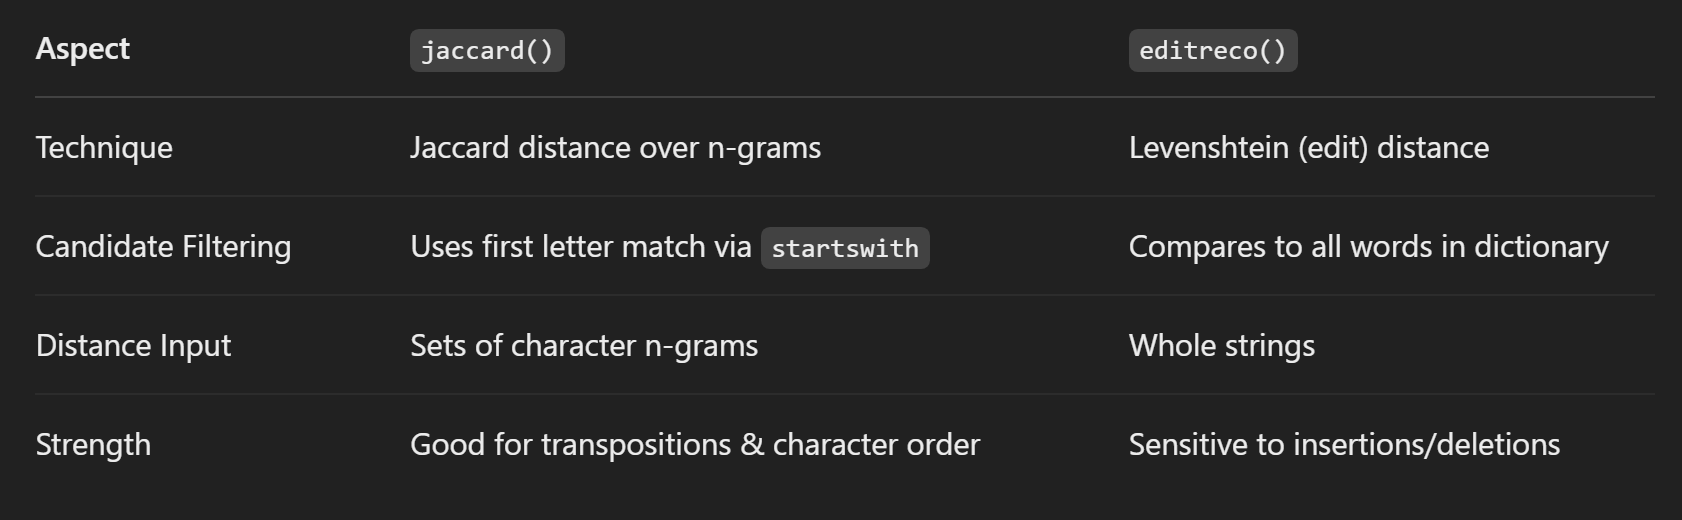